In [23]:
import pandas as pd
import numpy as np

from datetime import datetime as dt
from tqdm import tqdm

from news_vec.utils import read_json_gz_lines

In [40]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [3]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-acc-ts-ava.json/'))))

9100it [00:00, 297102.52it/s]


In [4]:
df.head(10)

,acc,window
0,0.293443,9
1,0.295129,9
2,0.275577,34
3,0.311141,9
4,0.284510,87
5,0.283162,34
6,0.298500,24
7,0.289061,28
8,0.293106,28
9,0.294792,49


In [30]:
tick_labels = [
    dt.fromtimestamp(ts).strftime('%b %Y')
    for ts in np.linspace(1483228802, 1537207799, 10, dtype='int')
]

In [31]:
tick_locs = np.linspace(0, len(df.window.unique()), len(tick_labels), dtype='int')

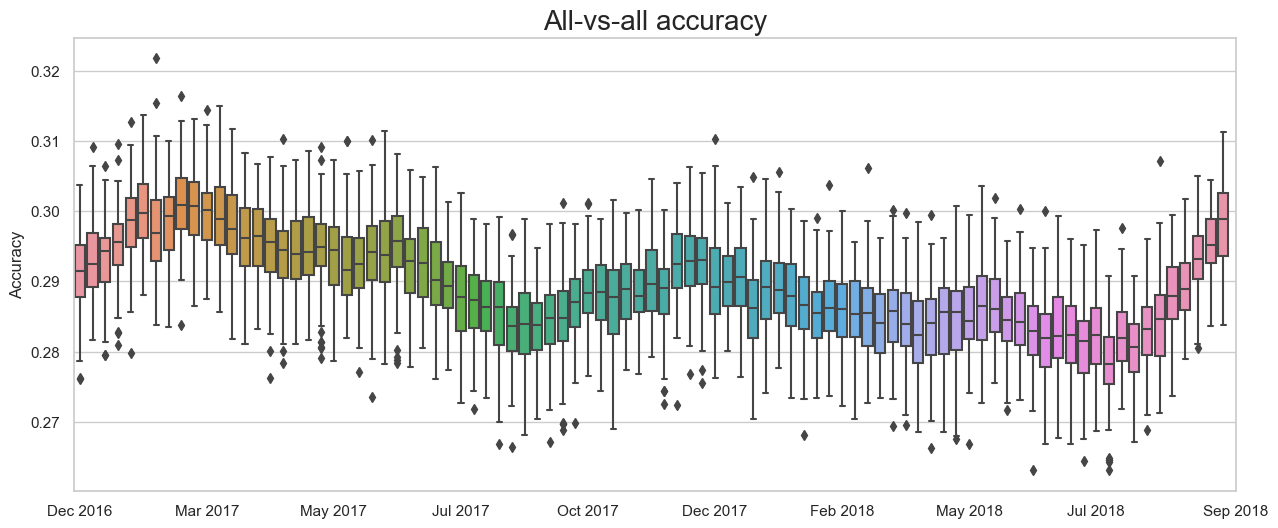

In [47]:
plt.figure(figsize=(15,6), dpi=100)

ax = sns.boxplot(x='window', y='acc', data=df)

plt.xticks(tick_locs, tick_labels)
plt.title('All-vs-all accuracy', fontdict=dict(fontsize=20))
plt.xlabel(None)
plt.ylabel('Accuracy')
plt.savefig('figures/ts-ava.png')